# Lesson 8 Practice: Seaborn

Use this notebook to follow along with the lesson in the corresponding lesson notebook: [L08-Seaborn-Lesson.ipynb](./L08-Seaborn-Lesson.ipynb).  


## Instructions
Follow along with the teaching material in the lesson. Throughout the tutorial sections labeled as "Tasks" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png). You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. For each task, use the cell below it to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a Setup

Import the following packages:
+ seaborn as sns
+ pandas as pd
+ numpy as np
+ matplotlib.pyplot as plt

Activate the `%matplotlib inline` magic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 2a Load Data

+ View available datasets by calling `sns.get_dataset_names`.
+ Choose one of those datasets and explore it.

What is the shape?

In [12]:
sns.get_dataset_names()
sns.load_dataset('tips').sample(5)
tips = sns.load_dataset('tips')

What are the columns?

In [16]:
tips.columns
tips.head(2)

# The columns names are variables, and the values in the columns are the corresponding values they are matched to


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


 What are the data types?

In [30]:
# Floats and categorical 
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Are there missing values?

In [33]:
# No missing values
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Are there duplicated rows?

In [47]:
######## Yes there is 2 duplicated rows
tips.duplicated(keep = False).sum()      #Make sure to set : keep = False


# Select duplicate rows except first occurrence based on all columns
duplicateRows = tips[tips.duplicated(keep = False)]
 
print("Duplicate Rows  based on all columns are :")
print(duplicateRowsDF)



Duplicate Rows  based on all columns are :
     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


For categorical columns find the unique set of categories.

In [59]:
tips.nunique()           # Gives us # of unique sum for each column
tips['sex'].nunique      # 2 : Male or female
tips['smoker'].nunique() # If we had () at the end, it gives us a sum instead of telling us the values
tips['day'].nunique      # Categories (4, object): [Thur, Fri, Sat, Sun]
tips['time'].nunique     # 2, object): [Lunch, Dinner]

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

Is the data tidy?

## Task 2b Preview Seaborn

Take some time to peruse the Seaborn [example gallery](https://seaborn.pydata.org/examples/index.html).  Indicate which plot types are most interesting to you. Which do you expect will be most useful with current research projects you may be working on?

## Task 3a Using `relplot`

Experiment with the `size`, `hue` and `style` semantics by applying them to another example dataset of your choice.

*You should produce three or more plots for this task.*

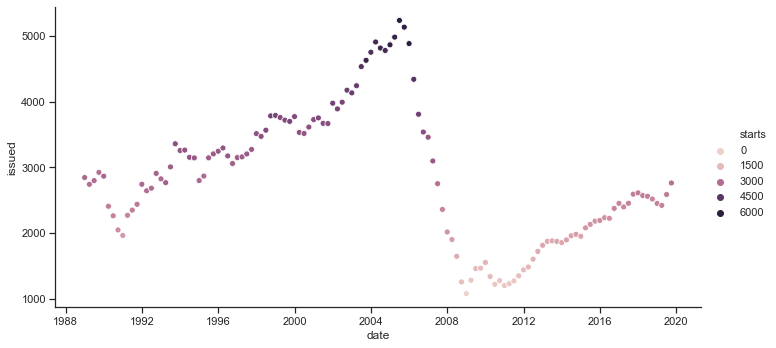

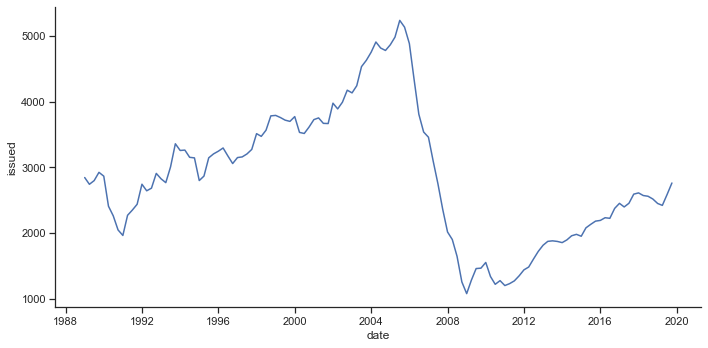

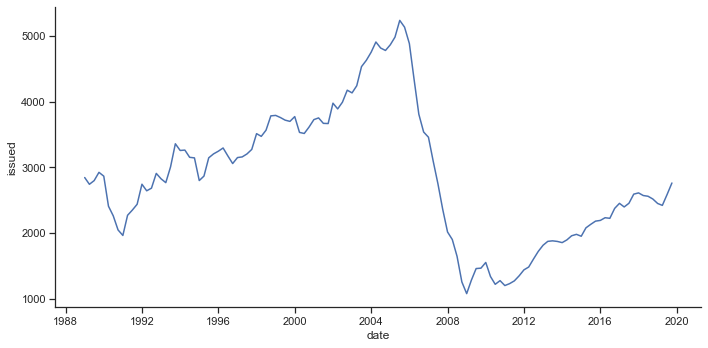

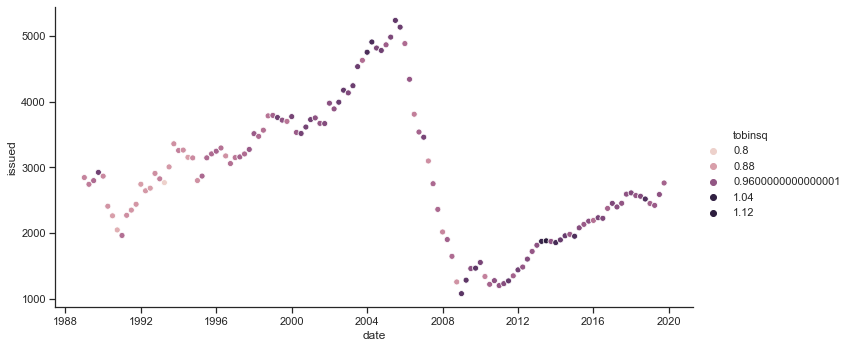

In [195]:
# https://pythonspot.com/read-excel-with-pandas/
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('ThesisPy.xlsx')

df.head()
df.dtypes
df.columns

# I cannot use style with my dataset because I have no categorical variables
# I cannot display confidence intervals because I am not estimating anything!
# Note : width = aspect * height
sns.relplot(x="date", y="issued", hue = "starts", data=df, aspect = 2);

sns.relplot(x="date", y="issued", kind = "line", data=df, aspect = 2)

sns.relplot(x="date", y="issued", kind = "line", err_style = "bars", ci=95, data=df, aspect = 2) # no estimation!

sns.relplot(x="date", y="issued", hue = "tobinsq", data=df, aspect = 2)




## Task 4a: Explore built-in styles

Using a dataset of your choice, practice creating a plot for each of these different styles:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

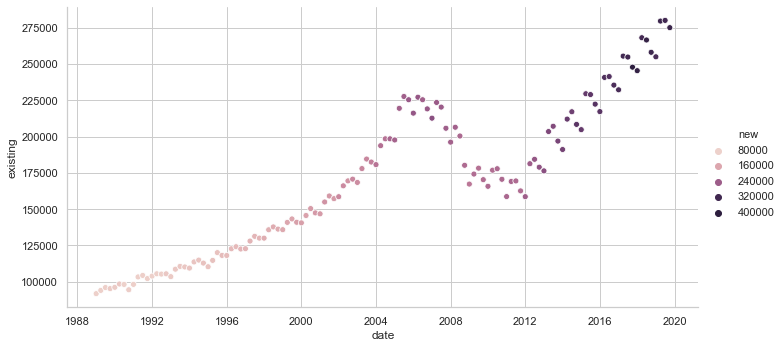

In [205]:
########### Full data ###############
df1 = pd.read_excel('mar7data.xlsx')
df.head()


#1
sns.set_style('whitegrid')
sns.relplot(x="date", y="existing", hue = "tobinsq", data=df1, aspect = 2)

#2
sns.axes_style('darkgrid')
sns.relplot(x="date", y="starts", hue = "issued", data=df1, aspect = 2)

#3 - dark
sns.axes_style('dark')
sns.relplot(x="date", y="existing", hue = "new", data=df1, aspect = 2)


#5
#sns.set_style('ticks')   




## Task 4b

Experiment with the style options and palettes introduced above. Create and demonstrate a style of your own using a dataset of your choice.

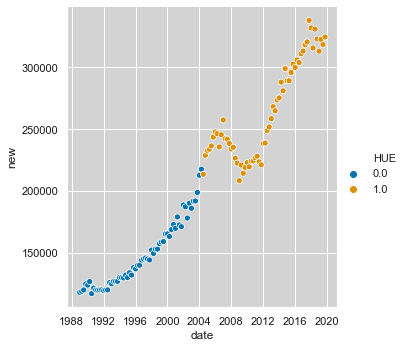

In [276]:
sns.axes_style()   # Check the default settings
                   # sns.set() resets changes back to the default
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'lightgrey',
               'axes.labelcolor': '.1',
               'text.color': '.1',
                'xtick.color': '.1',
                'ytick.color': '.1'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
colors=sns.color_palette('colorblind', 2)
sns.relplot(x="date", y="new", data=df1, hue = "HUE", palette=colors);

# Make dummy variables to use with the hue argument

arrayof1s = np.ones((62,1))
#print(arrayof1s.shape)

arrayzeros = np.zeros((62,1))
#print(arrayzeros.shape)

Dummy = np.vstack((arrayzeros,arrayof1s))
Dummy.shape

df1['HUE'] = Dummy


## Task 5a

Examine the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and find **two to four plots** types that interest you. Re-create a version of those plots using a different data set (make any other style changes you wish).




In [283]:
df2 = pd.read_excel('recession.xlsx')


#sns.set(style="ticks")
#sns.pairplot(df2, hue="recession")    # dont know how t interpret this and its too big



(array([ 1.,  3.,  2., 10., 16., 36., 29., 11., 11.,  5.]),
 array([-3.37012664, -2.79574626, -2.22136588, -1.6469855 , -1.07260512,
        -0.49822474,  0.07615564,  0.65053602,  1.2249164 ,  1.79929678,
         2.37367716]),
 <a list of 10 Patch objects>)

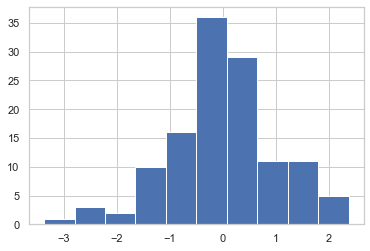

In [302]:
#date = pd.date_range("1989-01-01", periods=124, freq="3M")
import statsmodels.formula.api as sm

model1 = sm.ols(formula="starts ~ issued + tobinsq + investment", data=df).fit()
#print(result.params) #Gives just the coefficents
#print(model1.summary())


plt.hist(model1.resid_pearson)


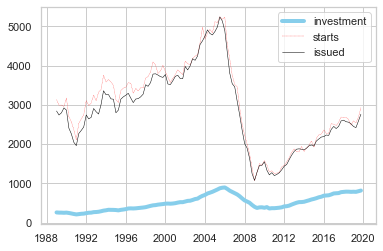

In [319]:
plt.plot( 'date', 'investment', data=df, markerfacecolor='blue', markersize=5, color='skyblue', linewidth=4)
plt.plot( 'date', 'starts', data=df, color='red', linewidth=.25, linestyle='dashed', label="starts")
plt.plot( 'date', 'issued', data=df, marker='', color='black', linewidth=.5)
plt.legend()

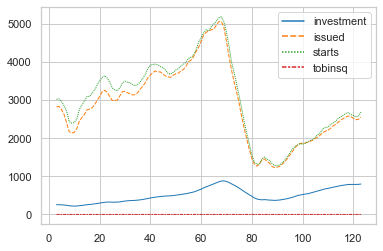

In [333]:
#df.drop(['date'], axis=1)


sns.set(style="whitegrid")

dates = pd.date_range("1 1 1989", periods=124, freq="3M")
#data = pd.DataFrame(df, dates, columns=['date', 'investment', 'issued', 'starts', 'tobinsq'])
#data = df.rolling(4).mean()

sns.lineplot(data=data, palette="tab10", linewidth=1)

In [321]:
df.columns

Index(['date', 'investment', 'issued', 'starts', 'tobinsq'], dtype='object')